In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel(r'D:\datascience\Copper_project\Copper_Set.xlsx')

df = pd.DataFrame(data)
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [3]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [4]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [5]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [6]:
df['item_date1'] = pd.to_datetime(df['item_date'], format= '%Y%m%d', errors= 'coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['delivery date1'] = pd.to_datetime(df['delivery date'], format= '%Y%m%d', errors= 'coerce').dt.date
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['material_ref'].fillna('unknown', inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [8]:
df.loc[df['quantity tons'] < 0 , 'quantity tons'] = pd.NA
df.loc[df['selling_price'] < 0 , 'selling_price'] = pd.NA

In [9]:
df.isnull().sum()

id                 2
item_date          1
quantity tons      5
customer           1
country           28
status             2
item type          0
application       24
thickness          1
width              0
material_ref       0
product_ref        0
delivery date      1
selling_price      6
item_date1         3
delivery date1     3
dtype: int64

In [10]:
df.country.fillna(df.country.mode()[0], inplace = True)
df.application.fillna(df.application.mode()[0], inplace = True)

In [11]:
df1 = df.copy()

In [12]:
df1 = df1.dropna()

In [13]:
df1.isnull().sum()

id                0
item_date         0
quantity tons     0
customer          0
country           0
status            0
item type         0
application       0
thickness         0
width             0
material_ref      0
product_ref       0
delivery date     0
selling_price     0
item_date1        0
delivery date1    0
dtype: int64

In [14]:
df1

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date1,delivery date1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,20200702.0,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,20200701.0,602.00,2020-07-02,2020-07-01
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,20200701.0,619.00,2020-07-02,2020-07-01


In [15]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181650.0,2.020459e+07,4.511699e+03,2.020070e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181650.0,5.875643e+03,2.349223e+06,1.000000e-05,1.097015e+01,3.036500e+01,6.716006e+01,1.000000e+09
customer,181650.0,3.051224e+07,2.433529e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181650.0,4.489890e+01,2.440608e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181650.0,2.561387e+01,1.775379e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181650.0,2.564967e+00,6.572691e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181650.0,1.295296e+03,2.616401e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181650.0,4.739707e+08,7.175157e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181650.0,2.020733e+07,4.416560e+03,2.019040e+07,2.020110e+07,2.021010e+07,2.021040e+07,2.022010e+07
selling_price,181650.0,1.918211e+03,3.318157e+05,0.000000e+00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [16]:
def plot(df, i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(df[i])
    plt.title(f'Box Plot for {i}')

    plt.subplot(1,3,2)
    sns.histplot(df[i], kde=True, bins=50)
    plt.title(f'Distribution Plot for {i}')

    plt.subplot(1,3,3)
    sns.violinplot(df[i])
    plt.title(f'Violin Plot for {i}')
    plt.show()

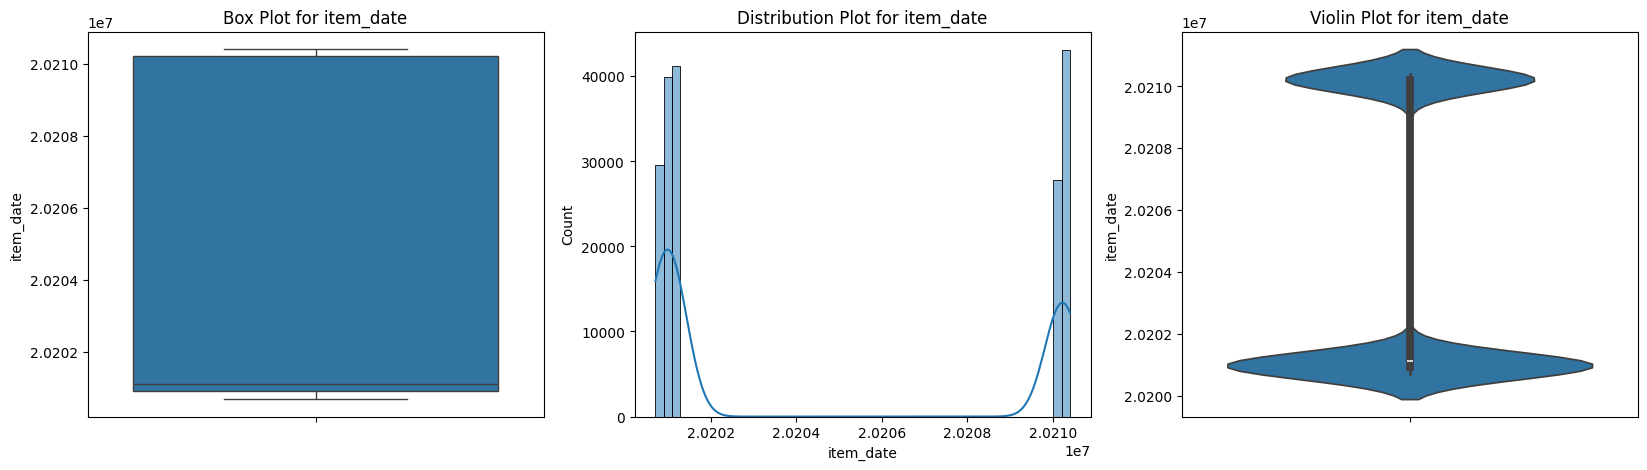

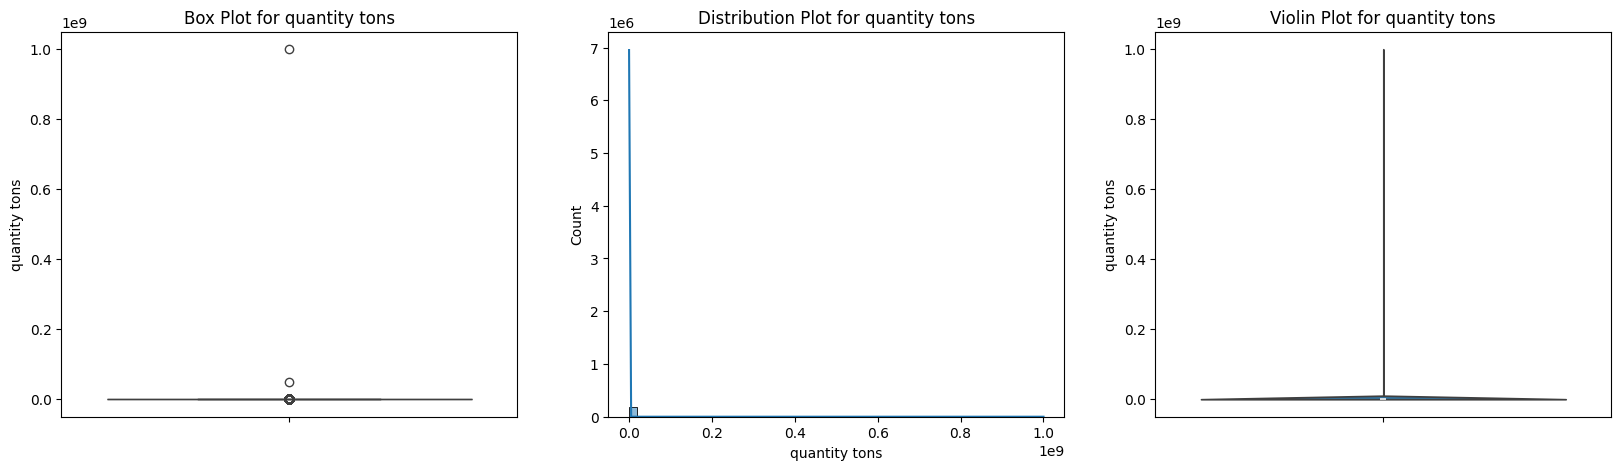

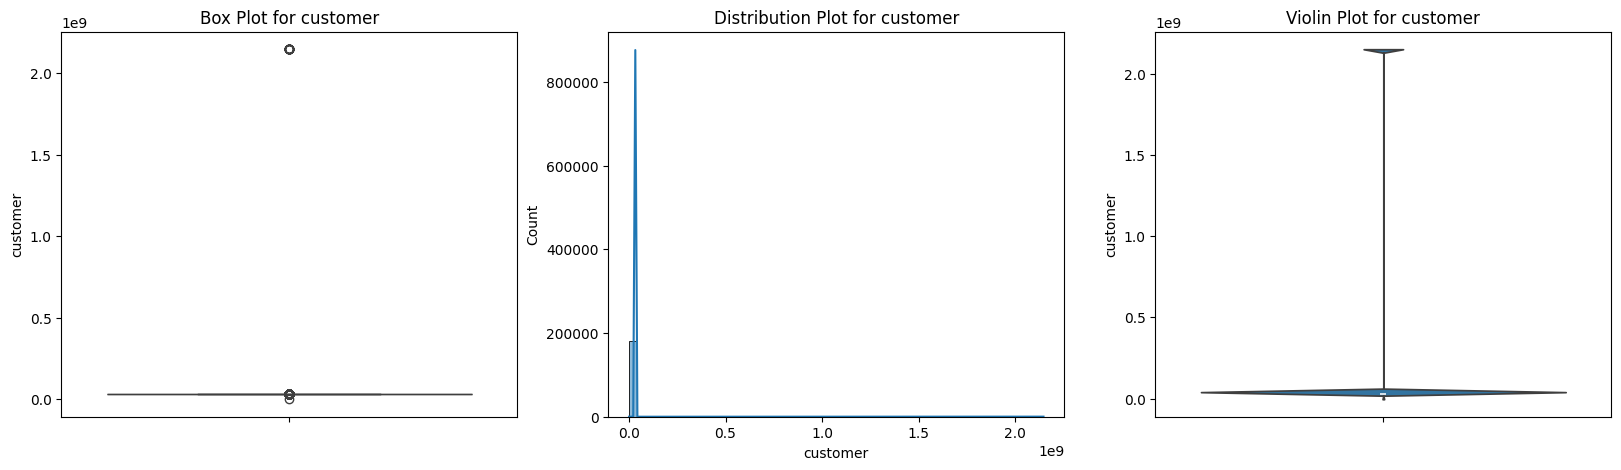

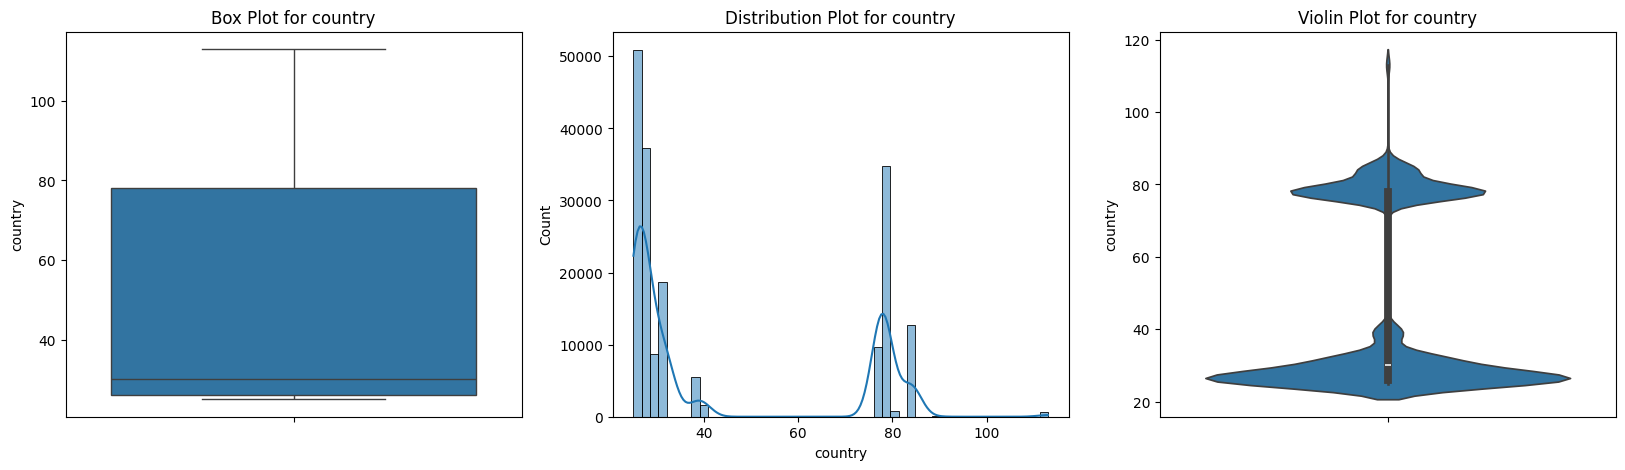

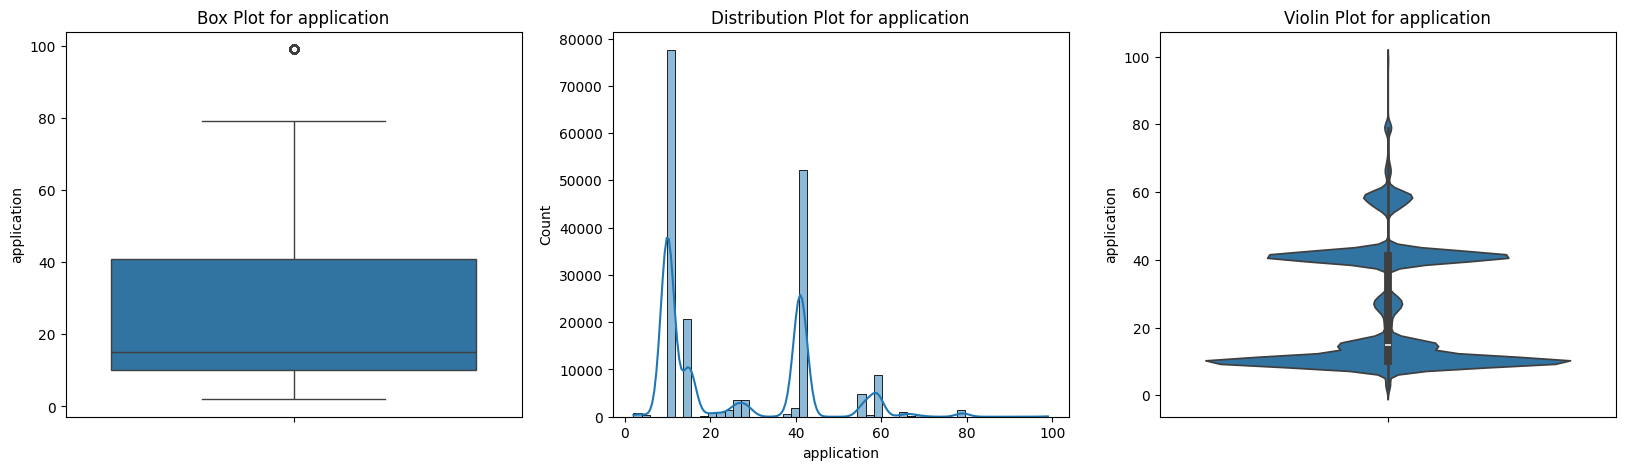

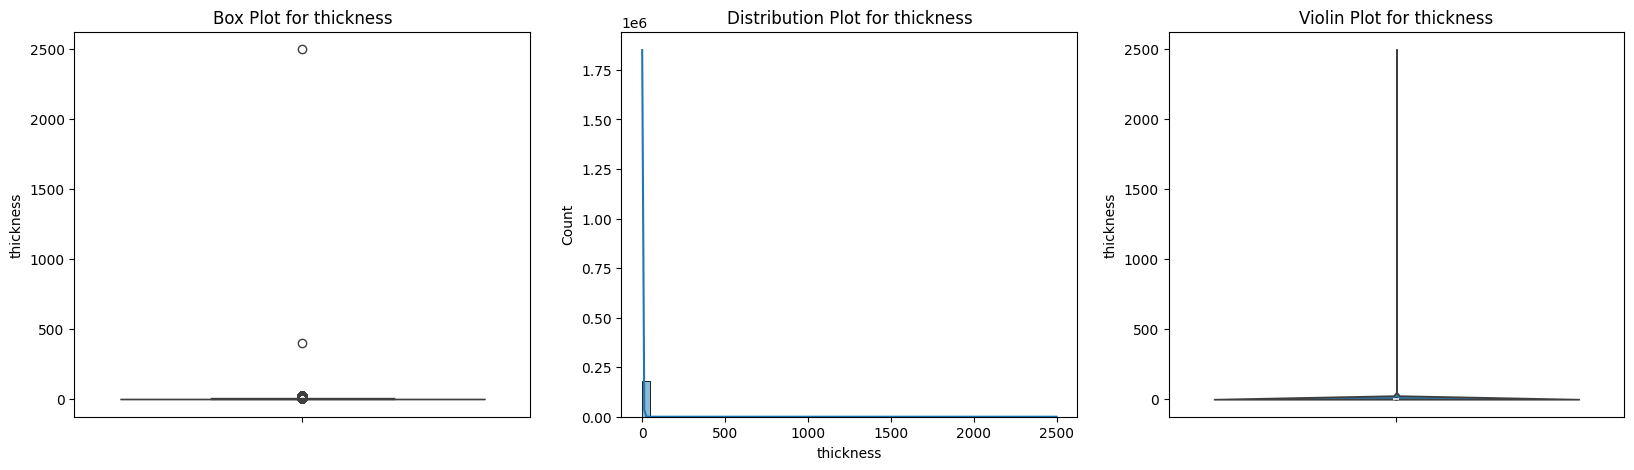

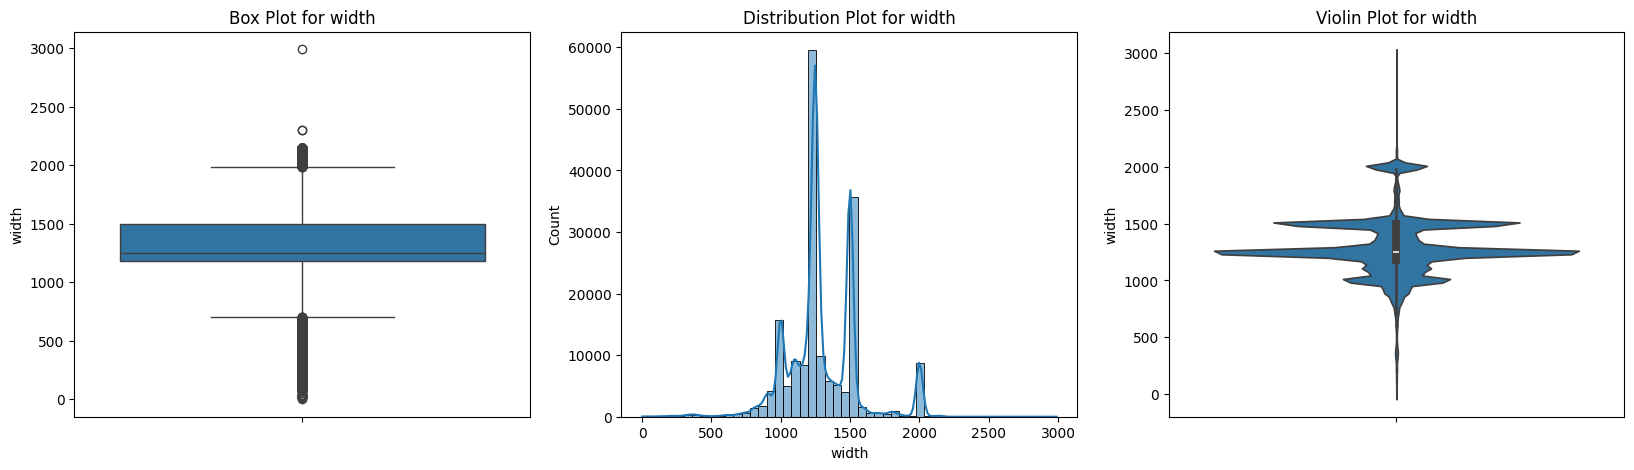

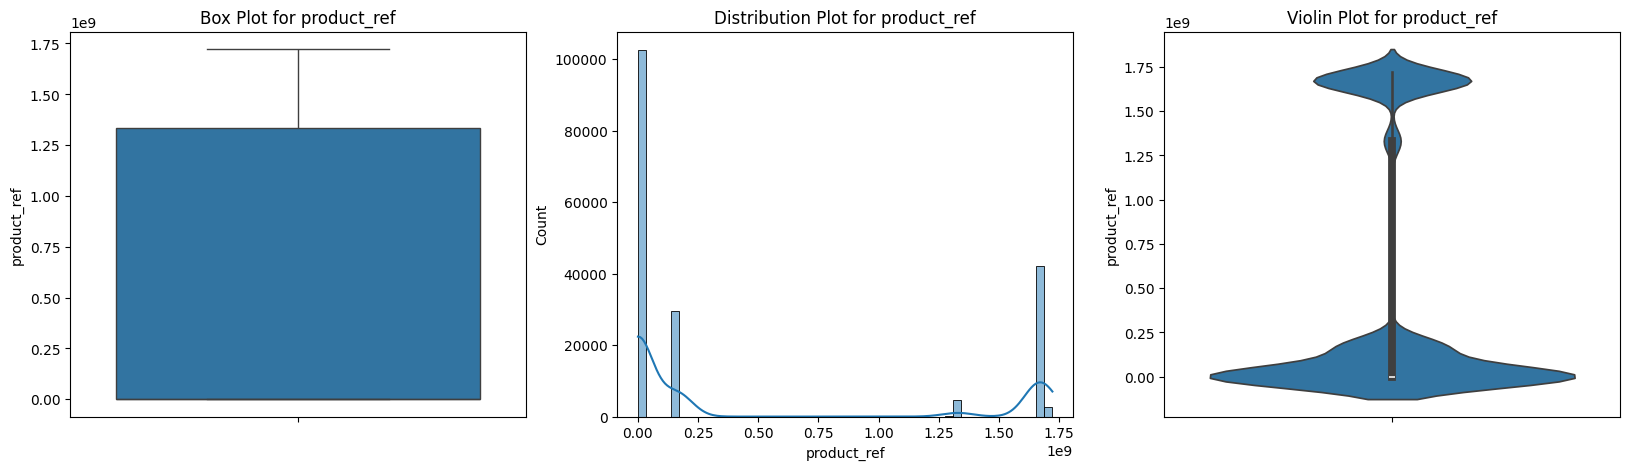

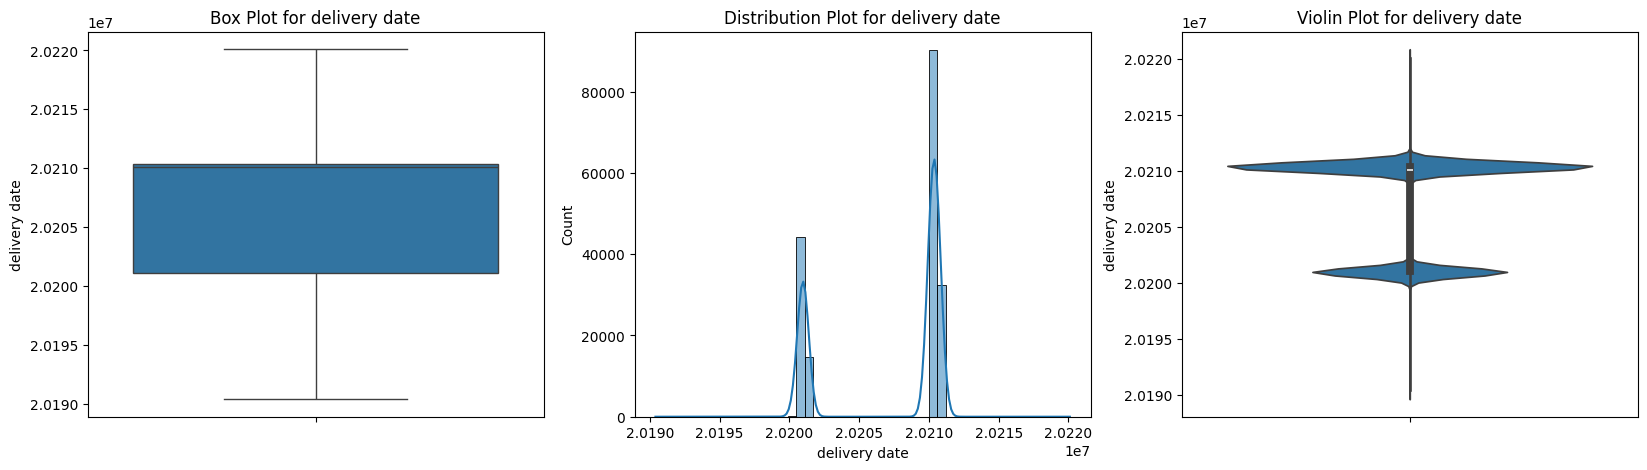

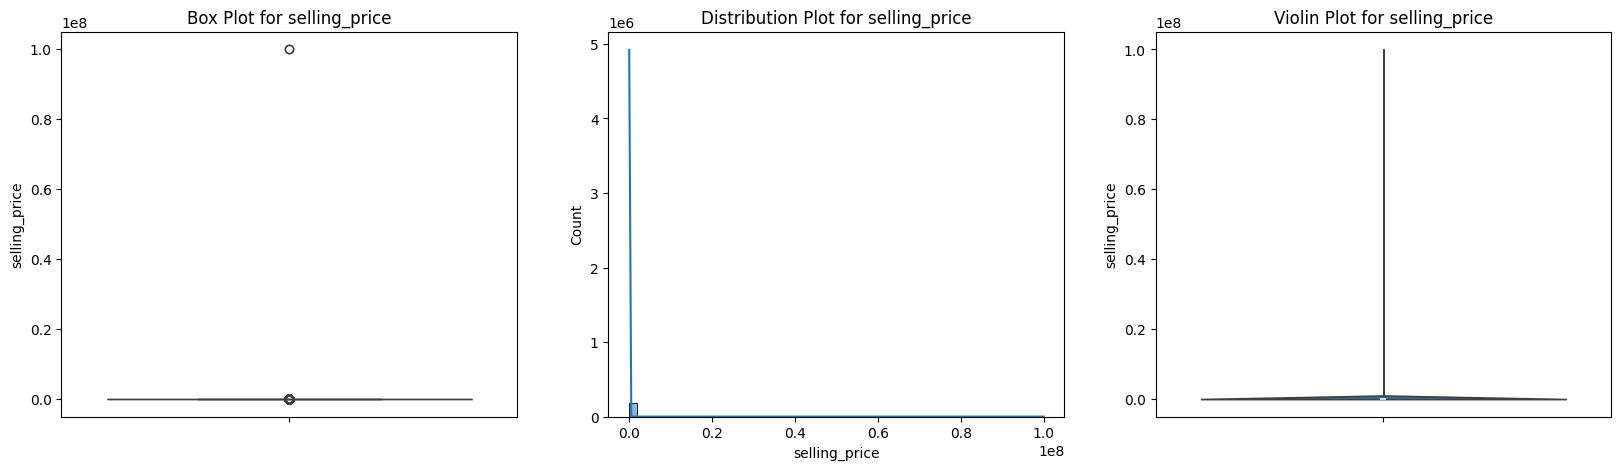

In [17]:
numeric_columns = df.select_dtypes(include=['number']).columns

for i in numeric_columns:
    plot(df1, i)

In [18]:
df1['quantity_log'] = np.log(df1['quantity tons'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1['thickness_log'] = np.log(df1['thickness'])

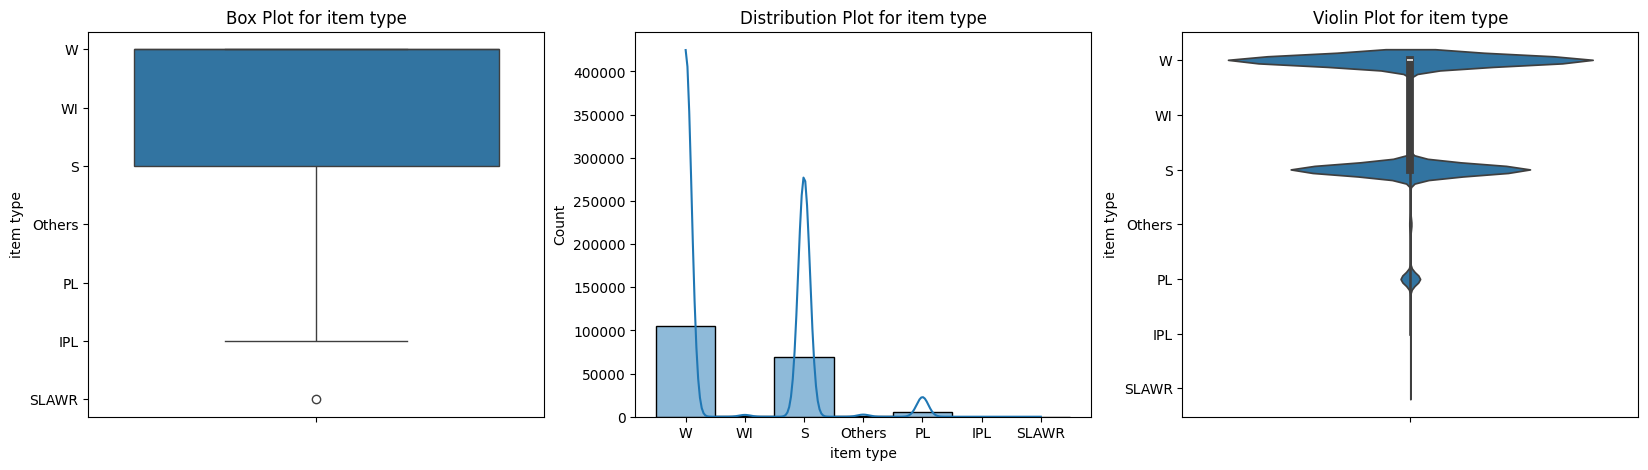

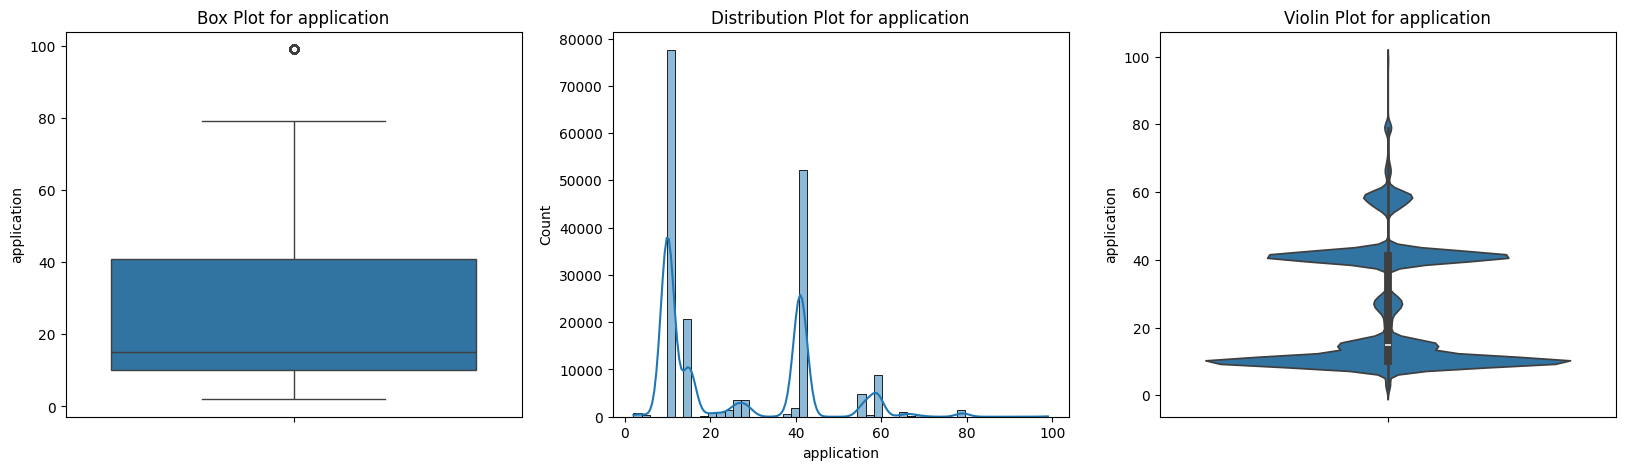

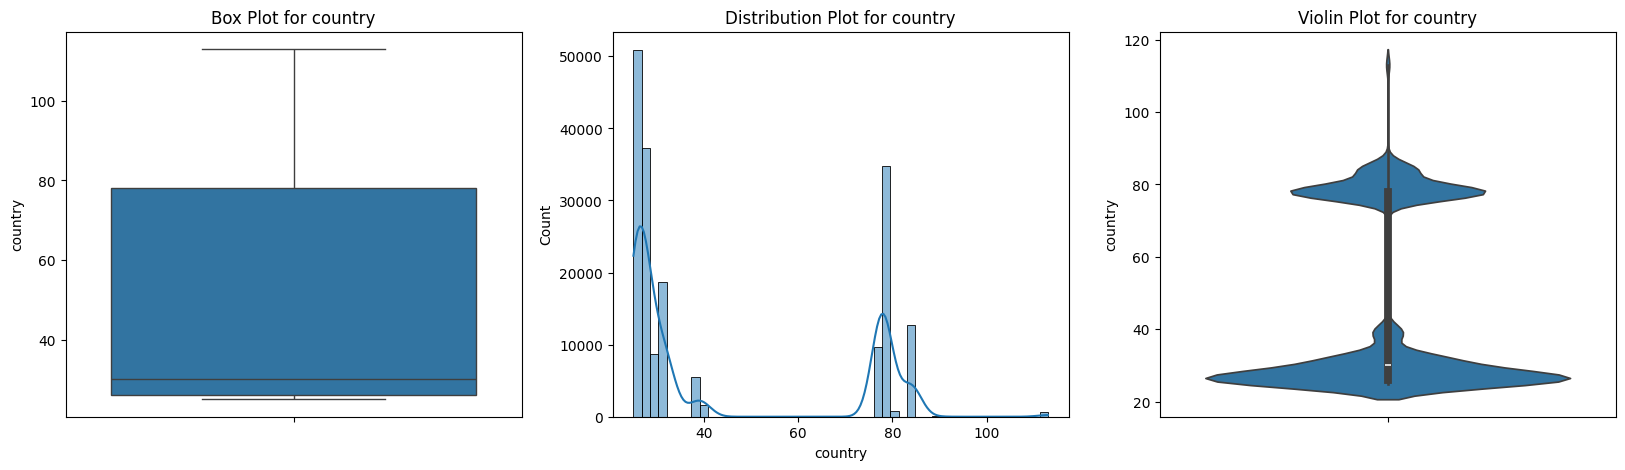

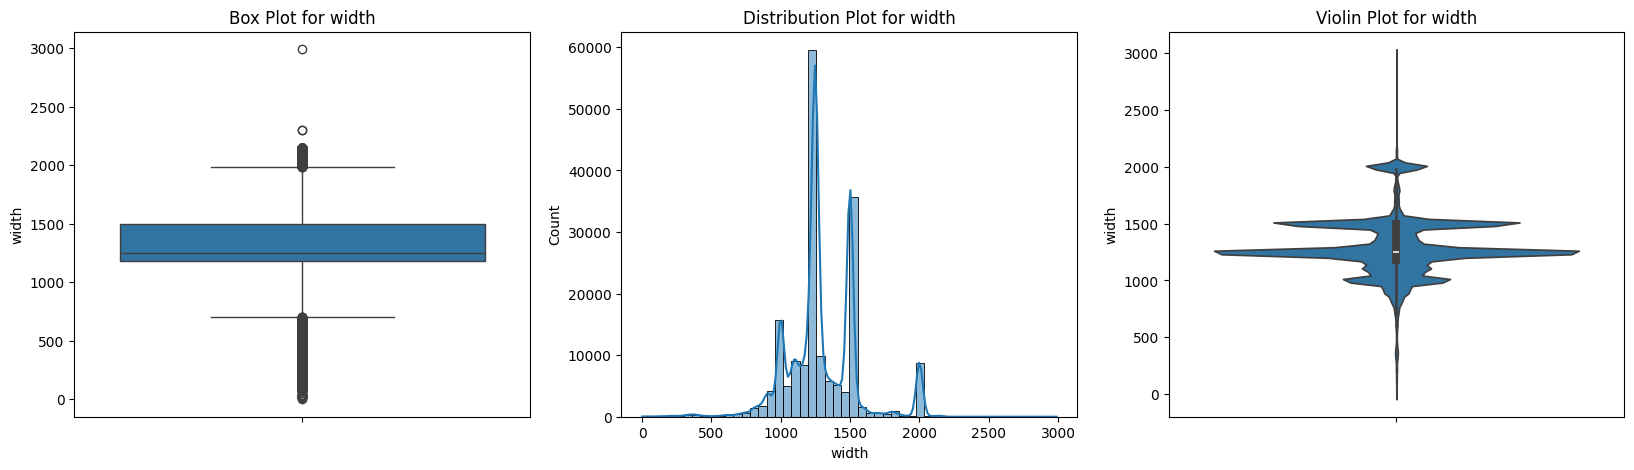

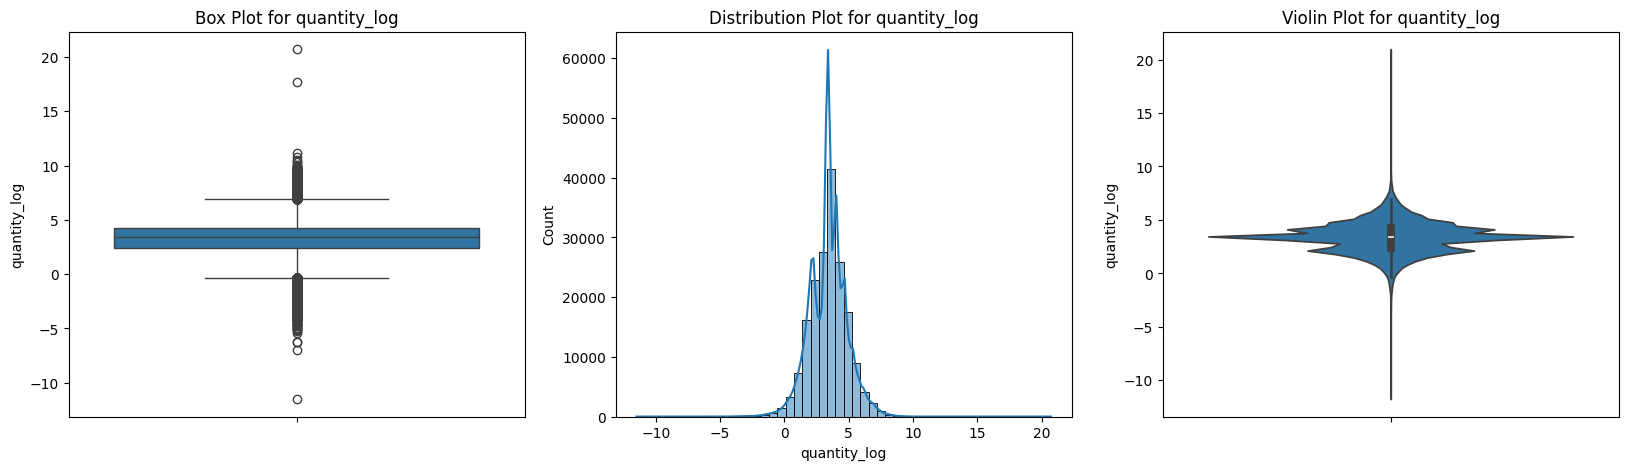

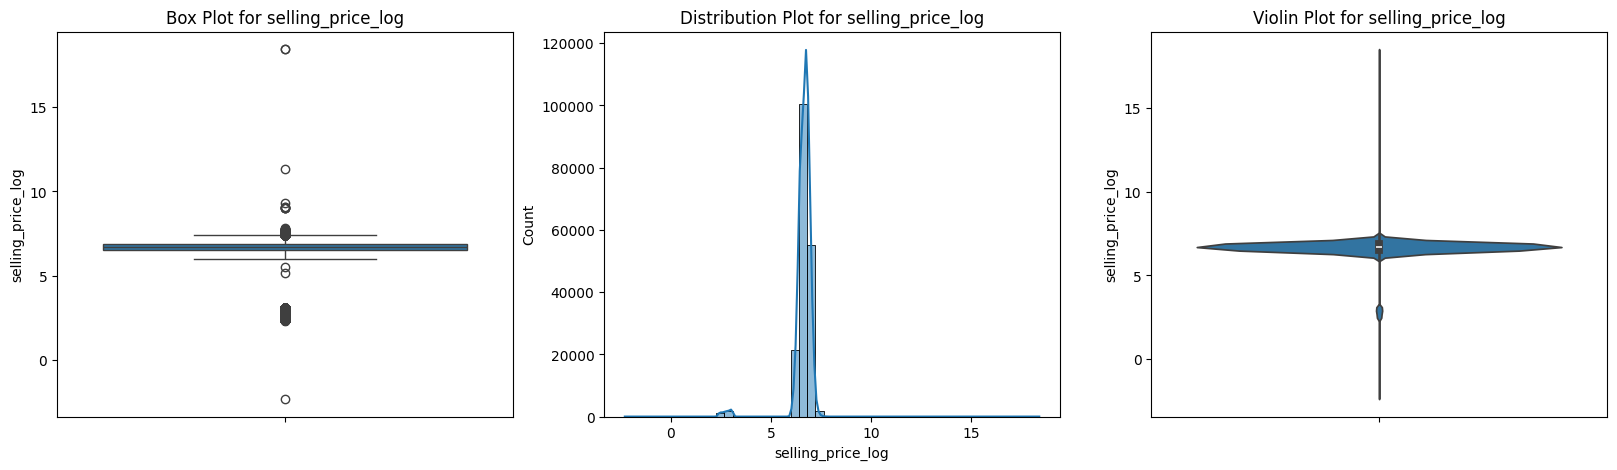

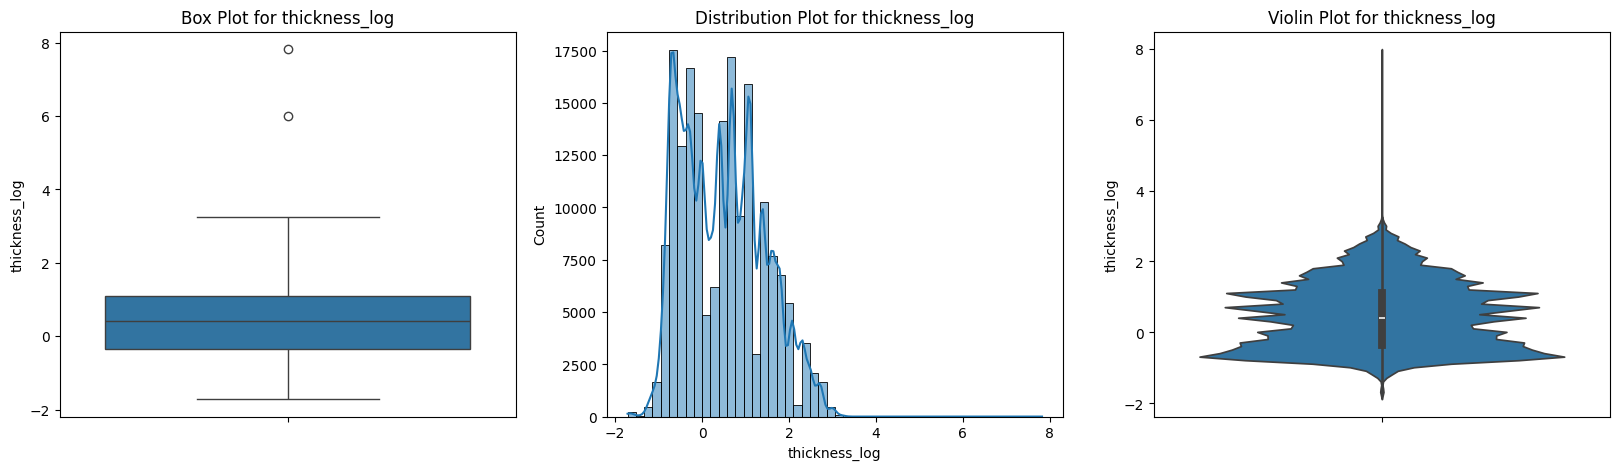

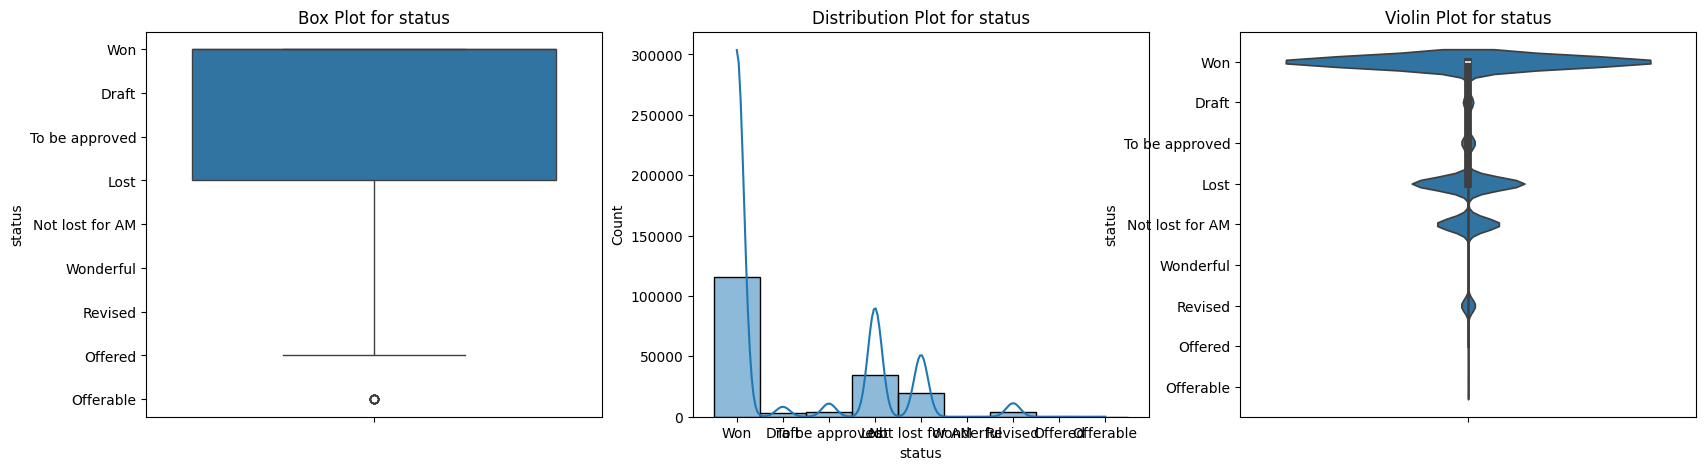

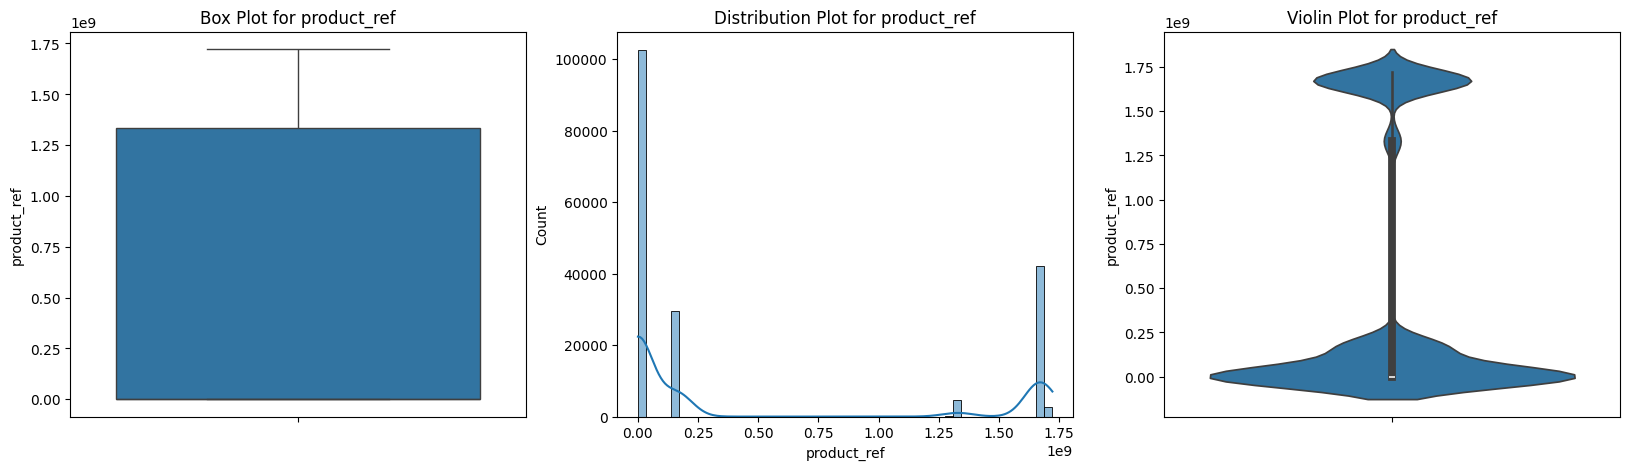

In [19]:
col = ['item type', 'application', 'country',  'width', 'quantity_log', 'selling_price_log', 'thickness_log', 'status', 'product_ref']

for i in col:
    plot(df1, i)

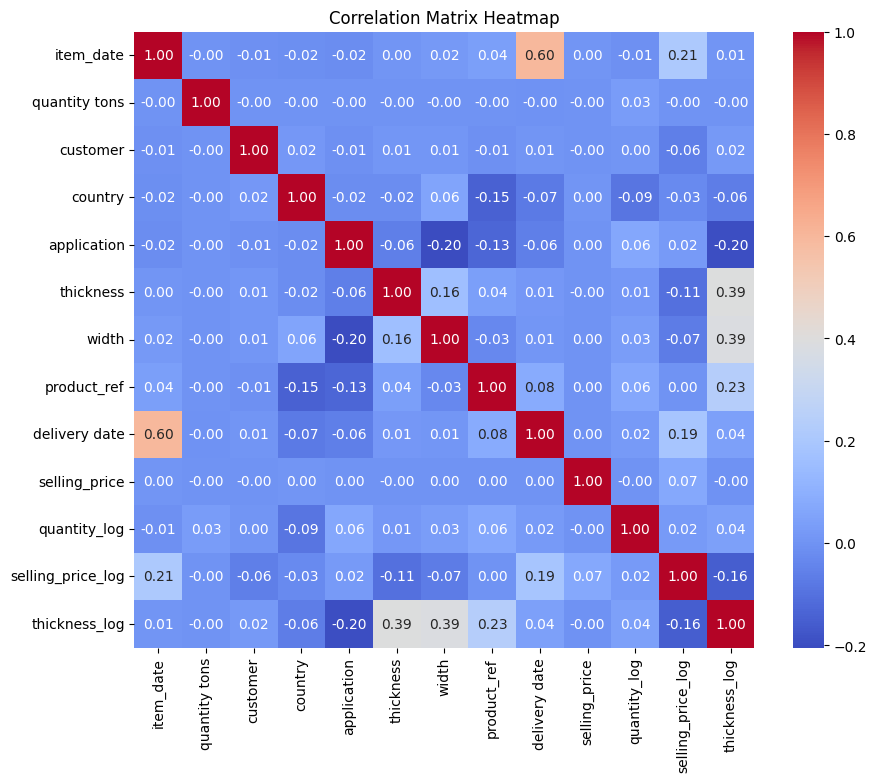

In [20]:
numeric_columns = df1.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [21]:
def iqr_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = df[col].clip(lower_bound, upper_bound)

In [22]:
df2 = df1.copy()

columns = ['width', 'quantity_log', 'selling_price_log', 'thickness_log']

for i in columns:
    iqr_outliers(df2, i)

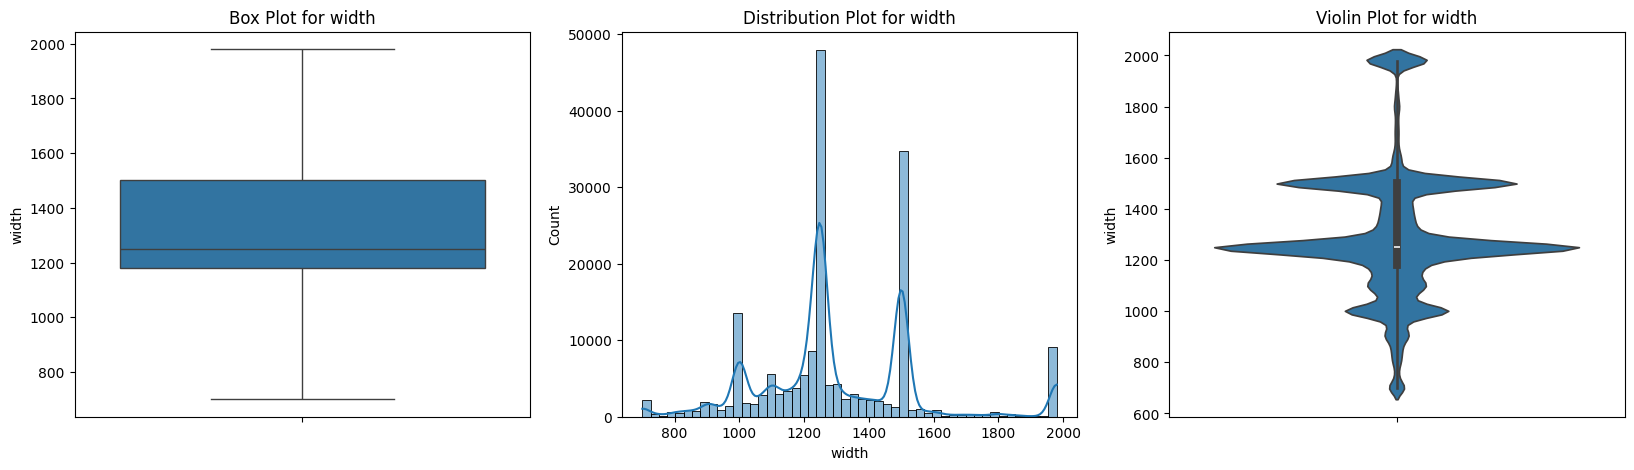

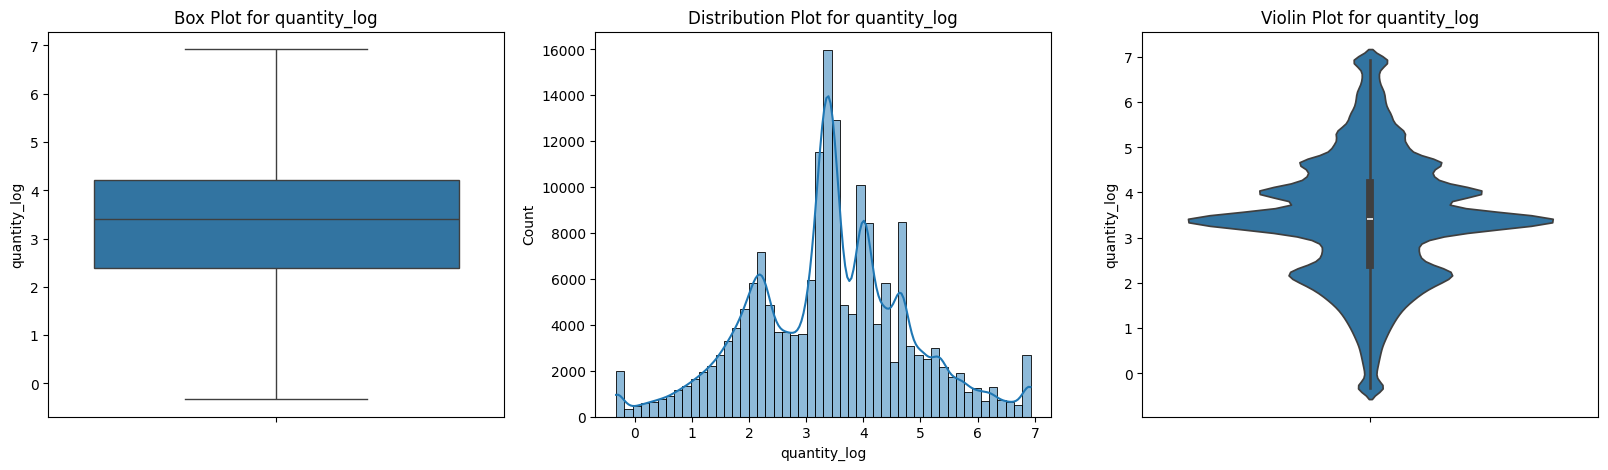

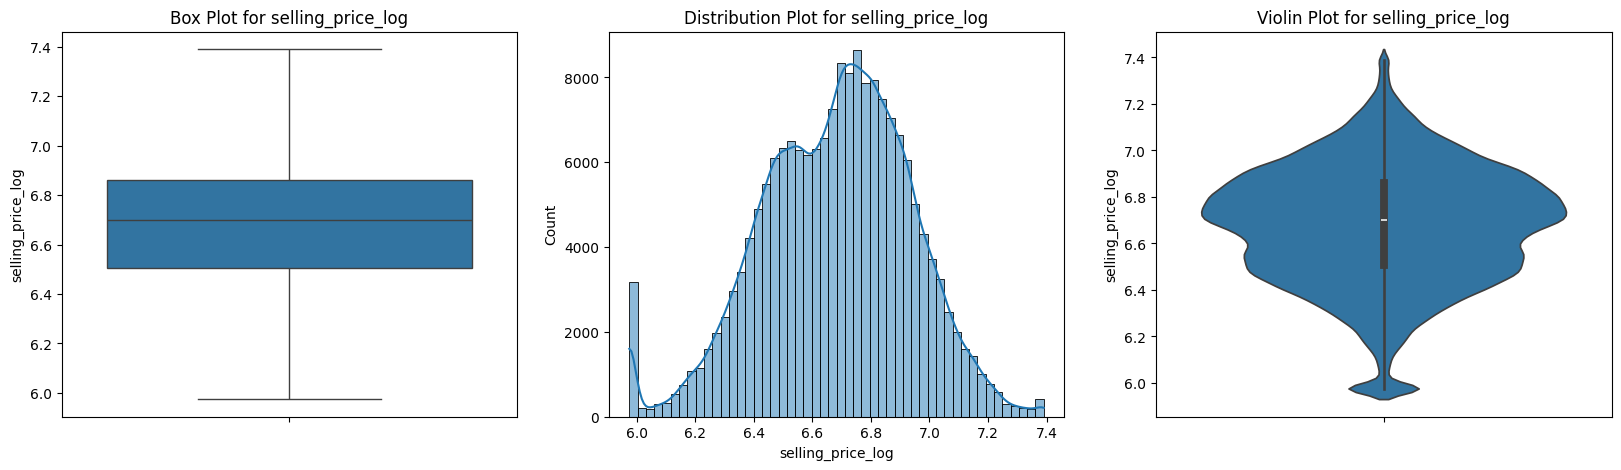

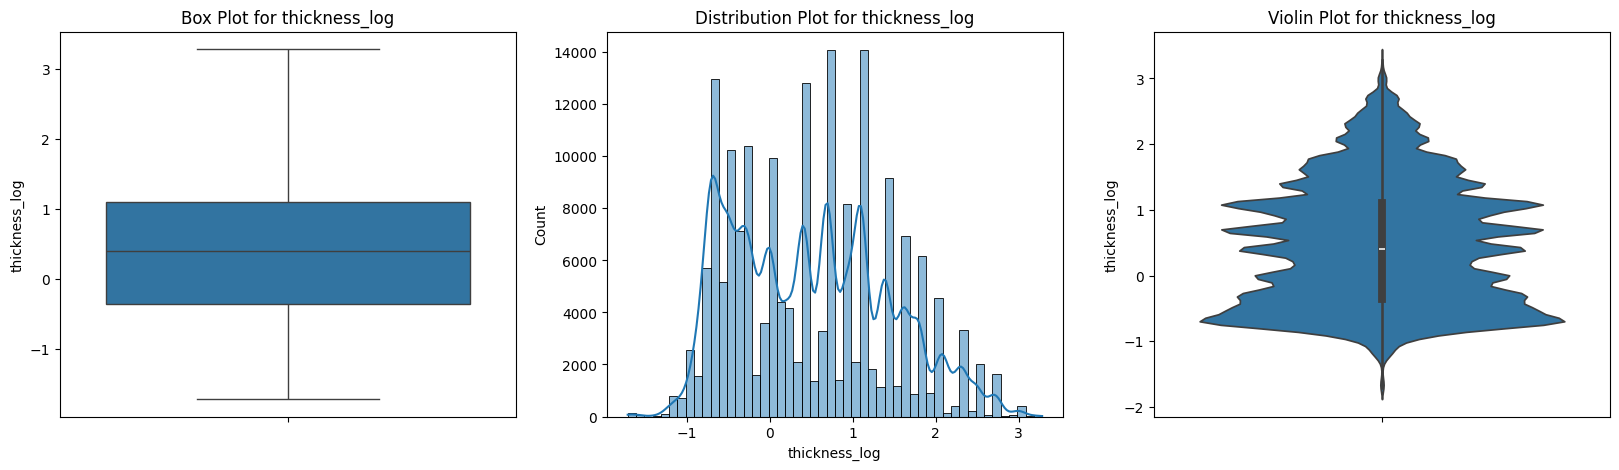

In [23]:
for i in columns:
    plot(df2, i)

In [24]:
df2

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date1,delivery date1,quantity_log,selling_price_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,6.749931,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,6.953684,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,6.468211,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,6.643790,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,1980.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,6.357842,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,20200702.0,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,20200701.0,602.00,2020-07-02,2020-07-01,4.670802,6.400257,-0.040822
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,6.381816,-0.040822
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,6.378426,-0.051293
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,6.428105,-0.342490


In [25]:
dfc = df2[df2['status'].isin(['Won', 'Lost'])]
dfc['status'].value_counts()

status
Won     115997
Lost     34435
Name: count, dtype: int64

In [26]:
def ml_class(x, y, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    accuracy_metrics = {'algorithm'    : algorithm.__name__,
                        'accuracy_train': accuracy_train,
                        'accuracy_test' : accuracy_test}
    
    return accuracy_metrics

In [27]:
x1 = dfc[['quantity_log', 'thickness_log', 'customer', 'country','application', 'selling_price_log', 'width', 'product_ref', 'item type']]
y1 = dfc['status']

oh = OneHotEncoder(handle_unknown= 'ignore', categories=[dfc['item type'].unique()])
oh.fit(x1[['item type']])
x_enc = oh.fit_transform(x1[['item type']]).toarray()

be = LabelBinarizer()
be.fit(y1)
y = be.fit_transform(y1).ravel()

x = np.concatenate((x1[['quantity_log', 'thickness_log', 'customer', 'country','application', 'selling_price_log', 'width', 'product_ref']], x_enc), axis= 1)
scaler = StandardScaler()

x = scaler.fit_transform(x)


In [28]:
print(ml_class(x, y, DecisionTreeClassifier))
print(ml_class(x, y, ExtraTreesClassifier))
print(ml_class(x, y, RandomForestClassifier))
print(ml_class(x, y, AdaBoostClassifier))
print(ml_class(x, y, GradientBoostingClassifier))

{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.912786253199056}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9295376740785056}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9351547179845116}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.813087373800324, 'accuracy_test': 0.8110811978595407}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8328306119905272, 'accuracy_test': 0.8309568916807923}


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(max_depth = 20, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:") #tn,fn,fp,tp
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[ 5461  1459]
 [  729 22438]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      6920
           1       0.94      0.97      0.95     23167

    accuracy                           0.93     30087
   macro avg       0.91      0.88      0.89     30087
weighted avg       0.93      0.93      0.93     30087



In [30]:
x1 = dfc[['quantity_log', 'thickness_log', 'customer', 'country','application', 'selling_price_log', 'width', 'product_ref', 'item type']]
y1 = dfc['status']

oh = OneHotEncoder(handle_unknown= 'ignore', categories=[dfc['item type'].unique()])
oh.fit(x1[['item type']])
x_enc = oh.fit_transform(x1[['item type']]).toarray()

be = LabelBinarizer()
be.fit(y1)
y = be.fit_transform(y1).ravel()

x = np.concatenate((x1[['quantity_log', 'thickness_log', 'customer', 'country','application', 'selling_price_log', 'width', 'product_ref']], x_enc), axis= 1)
scaler = StandardScaler()

x = scaler.fit_transform(x)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(max_depth = 20, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:") #tn,fn,fp,tp
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[ 5455  1465]
 [  728 22439]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      6920
           1       0.94      0.97      0.95     23167

    accuracy                           0.93     30087
   macro avg       0.91      0.88      0.89     30087
weighted avg       0.93      0.93      0.93     30087



In [31]:
FP, TP, threshold = roc_curve(y_test, y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.8784353947001055


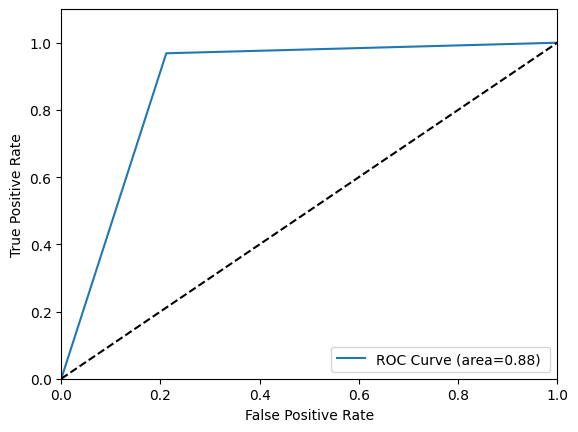

In [32]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [33]:
test_data = np.array([[5.45658, 1.15, 30156308, 32, 30, 6.6432, 1200, 628377, 'W']])
test_data_numeric = np.array(test_data[:, [0, 1, 2, 3, 4, 5, 6, 7]], dtype=float)

test_data_categorical = pd.DataFrame(test_data[:, [8]], columns=['item type'])

test_data_oh = oh.transform(test_data_categorical).toarray()

test_data_combined = np.concatenate((test_data_numeric, test_data_oh), axis=1)

test_data_combined_scaled = scaler.transform(test_data_combined)

pred = rfc.predict(test_data_combined_scaled)

if pred == 1:
    print("Won")
else:
    print("Lost")

Won


In [34]:
with open(r"D:\datascience\Copper_project\clasification_model.pkl", 'wb') as f:
    pickle.dump(rfc, f)

with open(r"D:\datascience\Copper_project\scaler.pkl", 'wb') as f:
    pickle.dump(scaler, f)
     
with open(r"D:\datascience\Copper_project\encoder.pkl", 'wb') as f:
    pickle.dump(oh, f)

In [35]:
with open(r"D:\datascience\Copper_project\clasification_model.pkl", 'rb') as f:
    model = pickle.load(f)

# Load the scaler
with open(r"D:\datascience\Copper_project\scaler.pkl", 'rb') as f:
    scaler = pickle.load(f)

# Load the OneHotEncoder
with open(r"D:\datascience\Copper_project\encoder.pkl", 'rb') as f:
    oh = pickle.load(f)

test_data = np.array([[5, 2.2, 30223043, 78, 10, 7.13, 1500, 1668701718, 'S']])
test_data_numeric = np.array(test_data[:, [0, 1, 2, 3, 4, 5, 6, 7]], dtype=float)

test_data_categorical = pd.DataFrame(test_data[:, [8]], columns=['item type'])

test_data_oh = oh.transform(test_data_categorical).toarray()

test_data_combined = np.concatenate((test_data_numeric, test_data_oh), axis=1)

test_data_combined_scaled = scaler.transform(test_data_combined)

pred = model.predict(test_data_combined_scaled)


if pred == 1:
    print("Won")
else:
    print("Lost")


Lost


In [36]:
dfc.to_csv('D:\\datascience\\Copper_project\\copper_data_status.csv', index=False, header=True, encoding='utf-8')

In [ ]:
df2.to_csv('D:\\datascience\\Copper_project\\copper_final_data.csv', index=False, header=True, encoding='utf-8')